In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# !unzip -qq 'gdrive/My Drive/Colab Notebooks/Data/Plant Classification/Final Data.zip'

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
# train_path = "Final Data/Test"
# test_path= "Final Data/Validate"
!pwd

/content


In [0]:
train_path = "gdrive/My Drive/GoogleColab/Project/Data/train"
test_path = "gdrive/My Drive/GoogleColab/Project/Data/validation"


batch_size = 32
image_size = 224
num_class = 11
# check_path = "gdrive/My Drive/GoogleColab/Project/Data/Check"



In [0]:
#Load the VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

##print(base_model.summary())

    # Freeze the layers 
for layer in base_model.layers:
    layer.trainable = False
 
##Create the model
model = keras.models.Sequential()

# # Add the vgg convolutional base model
model.add(base_model)
 
# # Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))
 
# # Show a summary of the model. Check the number of trainable parameters    
##print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 3s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# # Compile the model
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
          optimizer=SGD(lr=1e-3),
          metrics=['accuracy'])

train_datagen = ImageDataGenerator(
         zoom_range=0.2, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
 
validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
         shuffle = True)
 
validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 836 images belonging to 11 classes.
Found 78 images belonging to 11 classes.


In [0]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data= validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)
 
# Save the model
#model.save('small_last4.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
27/26 [===============================] - 232s 9s/step - loss: 12.5580 - acc: 0.1194 - val_loss: 13.8049 - val_acc: 0.0897
Epoch 2/100
27/26 [===============================] - 191s 7s/step - loss: 11.6146 - acc: 0.1935 - val_loss: 11.9508 - val_acc: 0.1538
Epoch 3/100
27/26 [===============================] - 191s 7s/step - loss: 10.8756 - acc: 0.2376 - val_loss: 4.8688 - val_acc: 0.4872
Epoch 4/100
27/26 [===============================] - 191s 7s/step - loss: 9.8237 - acc: 0.3001 - val_loss: 6.0874 - val_acc: 0.5000
Epoch 5/100
27/26 [===============================] - 189s 7s/step - loss: 8.7187 - acc: 0.3479 - val_loss: 6.4094 - val_acc: 0.4744
Epoch 6/100
27/26 [===============================] - 190s 7s/step - loss: 8.6531 - acc: 0.3612 - val_loss: 5.0572 - val_acc: 0.5513
Epoch 7/100
27/26 [===============================] - 191s 7s/step - loss: 7.7019 - acc: 0.4079 - val_loss: 5.4664 - val_acc: 0.5513
Epoch 8/100
27/2

In [0]:
model.save('leaf_classification.h5')

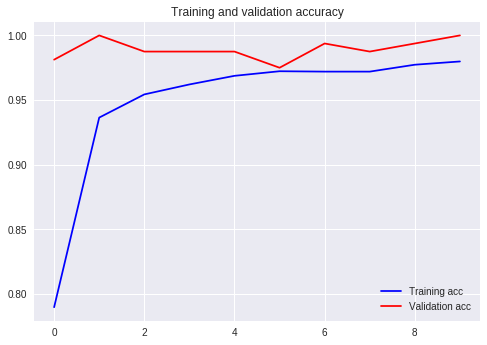

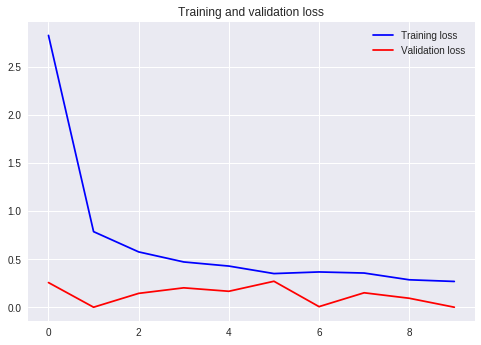

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
#model.save_weights('model_saved.h5')

In [0]:
model = load_model("gdrive/My Drive/Colab Notebooks/Model/Leaf Classification.h5")


Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import os
import heapq

model.compile(loss='categorical_crossentropy',
          optimizer=SGD(lr=1e-3),
          metrics=['accuracy'])


# def correct_path_function(path_name):
#     b =path_name.split("/")
#     del b[0]
#     delimiter = "/"
#     path = delimiter.join(b)
#     return path
  
# correct_path_function("content/gdrive/My Drive/GoogleColab/Project/Data/Check")
# path_of_test_files = path
# print(path_of_test_files)
  


path_of_test_files = "gdrive/My Drive/Colab Notebooks/Data/Plant Classification/Check Flower_last"  

list_of_test_images = os.listdir(path_of_test_files)

for i in list_of_test_images: 
  image_name, image_ext = os.path.splitext(i)
  img_path = os.path.join(path_of_test_files, i)
  img = load_img(img_path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  bruh = preds.flatten()
  predss= preds.tolist()
  duh = heapq.nlargest(3, range(len(bruh)), bruh.take) 
  y = os.listdir("Final Data/Test")
  y.sort()
  print("Actual image: {}.....Predicted image: {},{}".format(image_name,y[duh[0]],y[duh[1]]))
  
  
#   preds = model.predict(x)  
#   #print(preds)
#   predicted_classes = np.argmax(preds,axis=1)
#   #print(predicted_classes)
#   y = os.listdir("Final Data/Test")
#   y.sort()
#   class_ = predicted_classes.tolist()
#   print("Actual image: {}.....Predicted image: {}".format(image_name,y[class_[0]]))
#   print(y[class_[0]])
#   # decode the results into a list of tuples (class, description, probability)
#   # (one such list for each sample in the batch)
#   #print('Predicted:', decode_predictions(preds, top=3))



Actual image: Adusi.....Predicted image: Adusi,Tulsi
Actual image: Money Plant.....Predicted image: Syngosium,Money Plant
Actual image: Asopalav.....Predicted image: Asopalav,Papaya
Actual image: Geranium.....Predicted image: Geranium,Syngosium
Actual image: Papaya.....Predicted image: Papaya,Tulsi
Actual image: Syngonium.....Predicted image: Syngosium,Geranium
Actual image: Palm.....Predicted image: Palm,Tulsi
Actual image: Tulsi.....Predicted image: Tulsi,Geranium
Actual image: Spyder Dev.....Predicted image: Spyder,Rapish
Actual image: Spyder Akshat.....Predicted image: Spyder,Rapish
Actual image: papaya Akshat.....Predicted image: Tulsi,Papaya


# New Section

# New Section